# Seminar`

Целью кластеризации является сегментация клиентов торгового центра на основе их покупательских привычек, а также географического положения и канала покупки. Мы стремимся понять, как различаются группы клиентов по объемам покупок различных категорий товаров, региону и типу канала, через который они совершают покупки. Это поможет в разработке таргетированных маркетинговых стратегий и улучшении обслуживания клиентов.

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Загрузка датасета
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
data = pd.read_csv(url)
data.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [2]:
data.shape

(440, 8)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


#Визуализация Данных

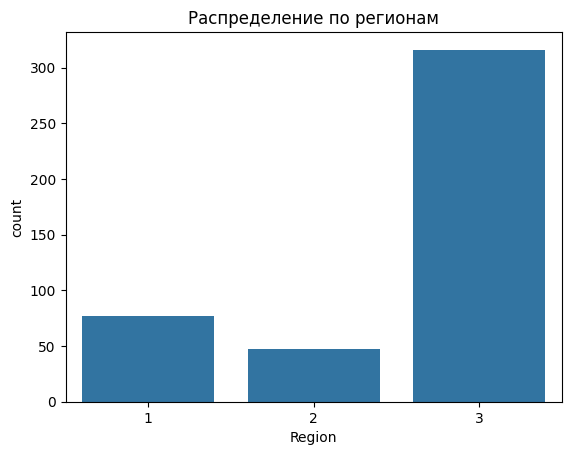

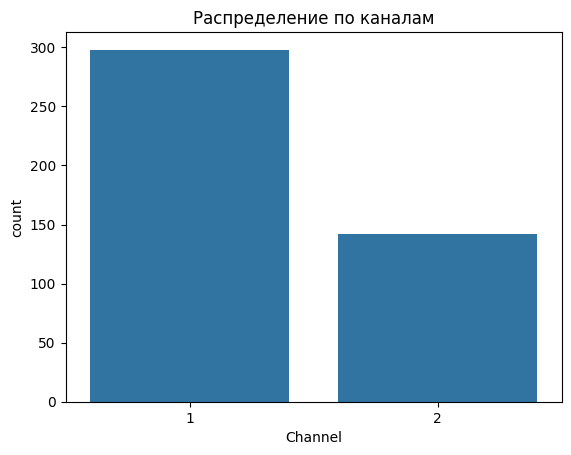

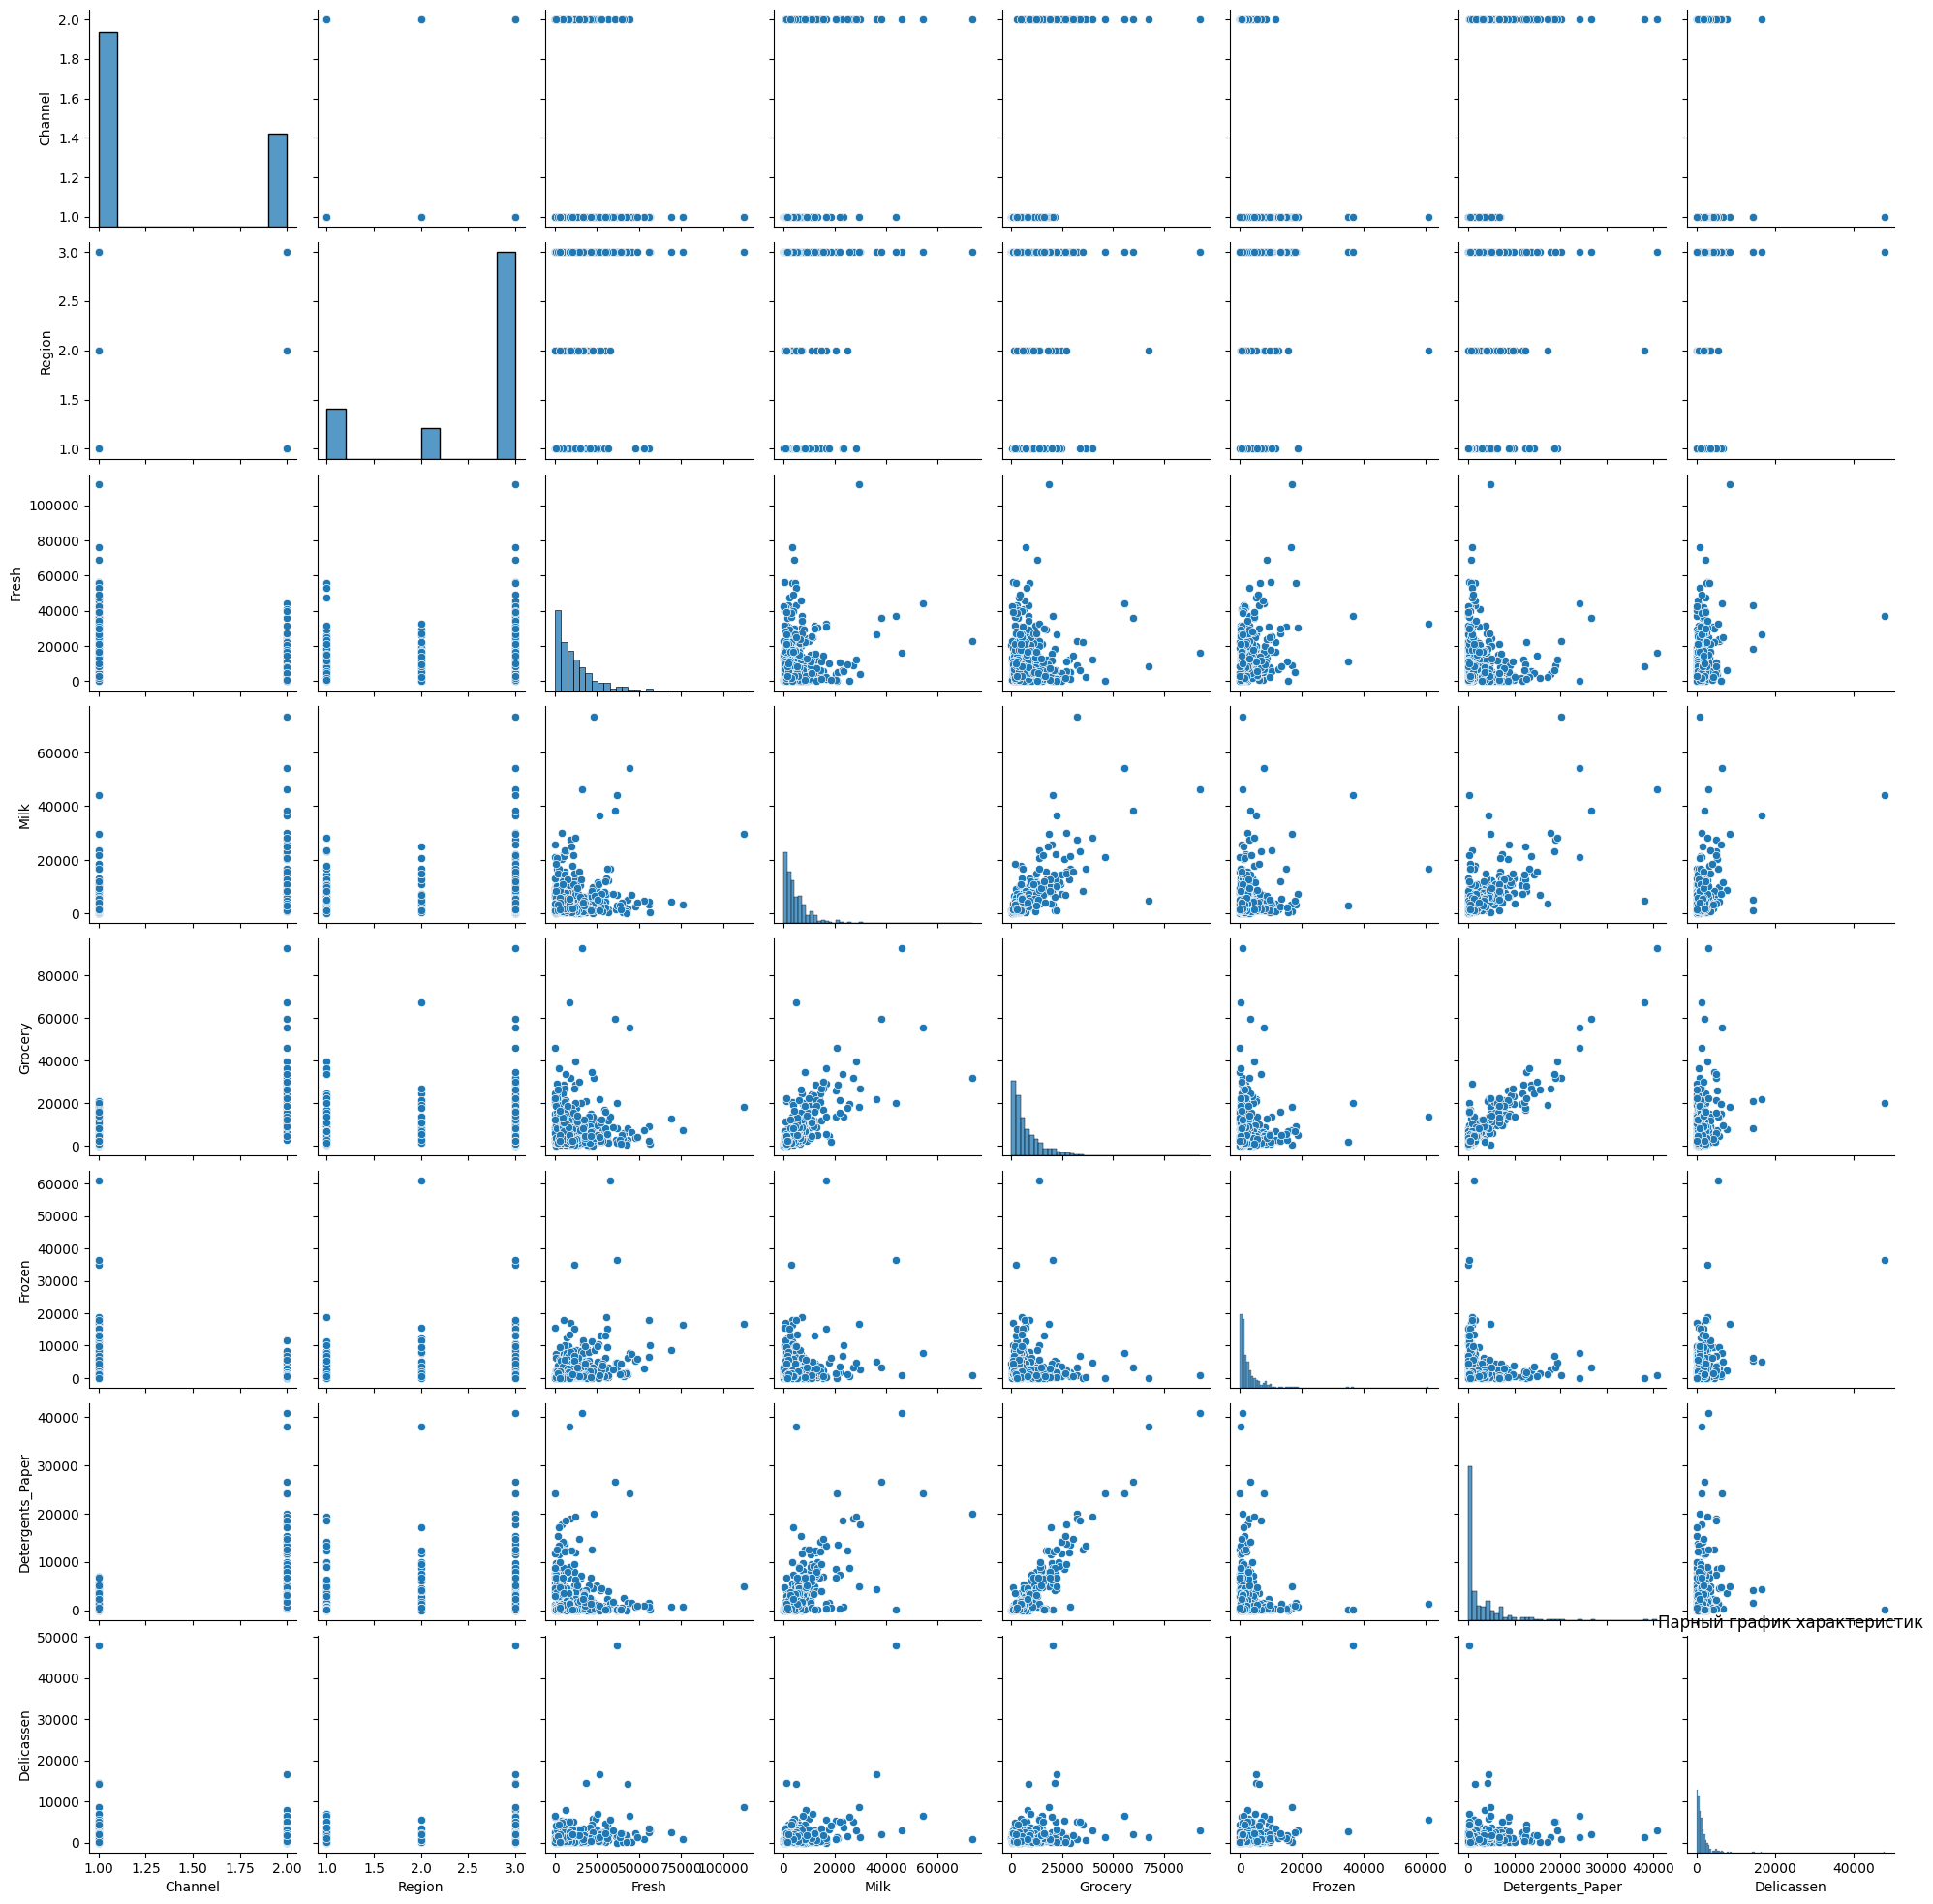

In [4]:
# Визуализация распределения по регионам
sns.countplot(x='Region', data=data)
plt.title('Распределение по регионам')
plt.show()

# Визуализация распределения по каналам
sns.countplot(x='Channel', data=data)
plt.title('Распределение по каналам')
plt.show()

# Визуализация отношения признаков
sns.pairplot(data[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])
plt.title('Парный график характеристик')
plt.show()


#Подготовка Данных

In [5]:
# Нормализация количественных признаков
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Преобразование категориальных признаков
data = pd.get_dummies(data, columns=['Channel', 'Region'], drop_first=True)*1
data.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_2,Region_2,Region_3
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,1,0,1
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,1,0,1
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,1,0,1
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0,0,1
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1,0,1


#Кластеризация K-Means и Метод Локтя

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

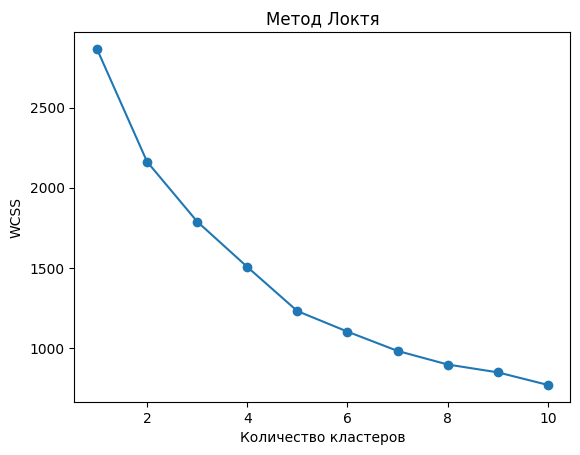

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
from sklearn.cluster import KMeans

# Определение оптимального количества кластеров методом локтя
wcss = []  # Внутрикластерная сумма квадратов
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Построение графика
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Метод Локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

# Оптимальное количество кластеров (например, 4 из метода локтя)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(data)
data['Cluster'] = kmeans_labels


#Визуализируем кластеры с использованием PCA.

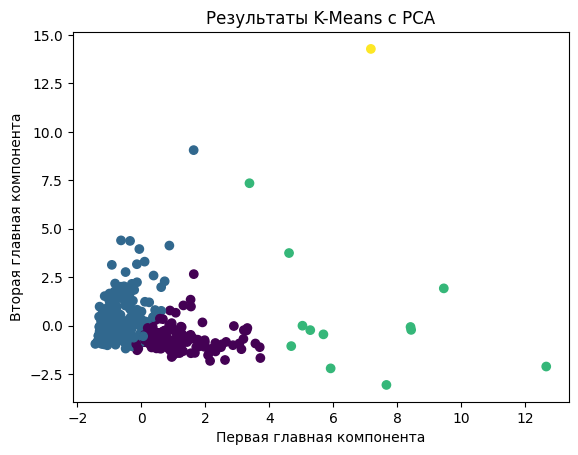

In [13]:
from sklearn.decomposition import PCA

# Снижение размерности с помощью PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data.drop(columns='Cluster'))

# Построение кластеров
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Результаты K-Means с PCA')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.show()


Выполним PCA для анализа объясненной дисперсии и визуализации.

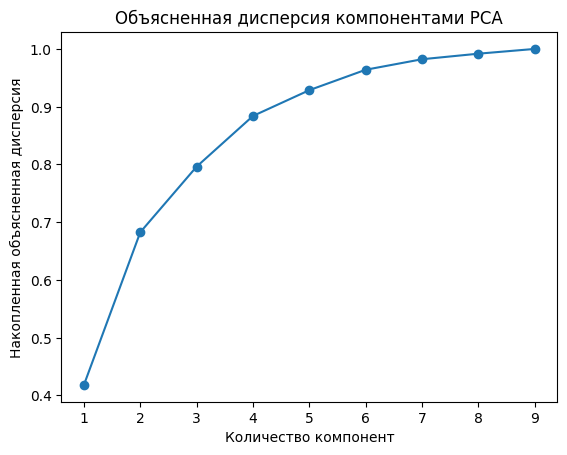

In [14]:
# Проверка объясненной дисперсии
pca_full = PCA()
X_pca_full = pca_full.fit_transform(data.drop(columns='Cluster'))
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Построение объясненной дисперсии
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Объясненная дисперсия компонентами PCA')
plt.xlabel('Количество компонент')
plt.ylabel('Накопленная объясненная дисперсия')
plt.show()


In [16]:
np.cumsum(pca_full.explained_variance_ratio_) #Делает по нарастающий

array([0.41812929, 0.68255155, 0.79618479, 0.88391603, 0.92861789,
       0.96393763, 0.98214863, 0.99176417, 1.        ])

#Определение Оптимального Количества Компонент PCA

In [9]:
# Оптимальное количество компонент PCA для объяснения 95% дисперсии
optimal_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Оптимальное количество компонент для объяснения 95% дисперсии: {optimal_components}")


Оптимальное количество компонент для объяснения 95% дисперсии: 6


 #Повторное Обучение Модели После Снижения Размерности

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


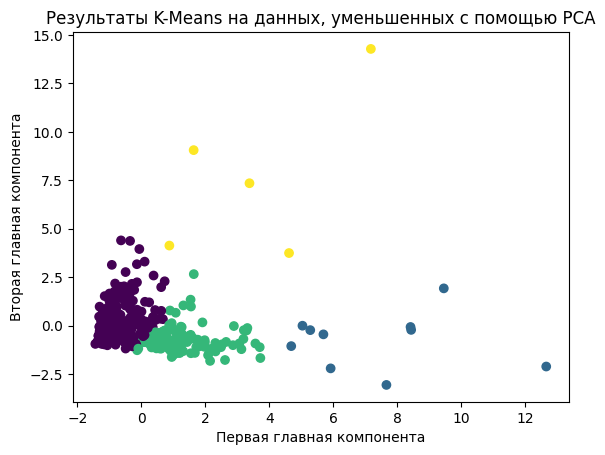

In [10]:
# Снижение размерности с помощью оптимального количества компонент PCA
pca_optimal = PCA(n_components=optimal_components)
X_pca_optimal = pca_optimal.fit_transform(data.drop(columns='Cluster'))

# Обучение K-Means на данных, уменьшенных с помощью PCA
kmeans_pca = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(X_pca_optimal)

# Визуализация результатов
plt.scatter(X_pca_optimal[:, 0], X_pca_optimal[:, 1], c=kmeans_pca_labels, cmap='viridis')
plt.title('Результаты K-Means на данных, уменьшенных с помощью PCA')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.show()


#Обучение K-Means на данных, уменьшенных с помощью t-SNE

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


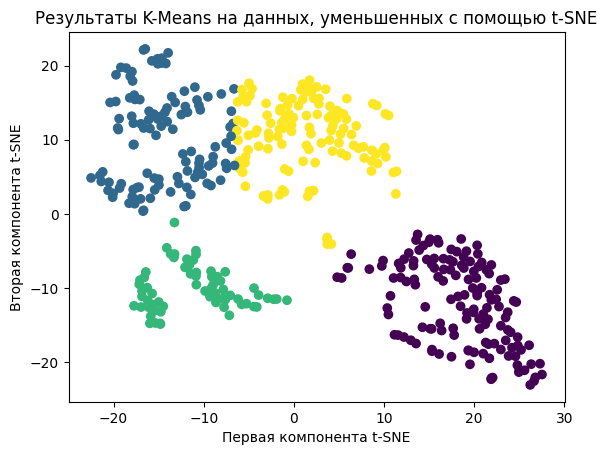

In [22]:
from sklearn.manifold import TSNE
optimal_clusters = 4
# Снижение размерности с помощью t-SNE
tsne = TSNE(n_components=2, random_state=42) # , perplexity=300 обычно раздвигают эти класстеры
X_tsne = tsne.fit_transform(data.drop(columns='Cluster'))

# Обучение K-Means на данных, уменьшенных с помощью t-SNE
kmeans_tsne = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_tsne_labels = kmeans_tsne.fit_predict(X_tsne)

# Визуализация результатов
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_tsne_labels, cmap='viridis')
plt.title('Результаты K-Means на данных, уменьшенных с помощью t-SNE')
plt.xlabel('Первая компонента t-SNE')
plt.ylabel('Вторая компонента t-SNE')
plt.show()


#Сравнение Результатов


In [23]:
from sklearn.metrics import silhouette_score

# Коэффициент силуэта для оригинальных данных
silhouette_original = silhouette_score(data.drop(columns='Cluster'), data['Cluster'])
print(f'Коэффициент силуэта (Оригинальные данные): {silhouette_original}')

# Коэффициент силуэта для данных, уменьшенных с помощью PCA
silhouette_pca = silhouette_score(X_pca_optimal, kmeans_pca_labels)
print(f'Коэффициент силуэта (Данные, уменьшенные с помощью PCA): {silhouette_pca}')

# Коэффициент силуэта для данных, уменьшенных с помощью t-SNE
silhouette_tsne = silhouette_score(X_tsne, kmeans_tsne_labels)
print(f'Коэффициент силуэта (Данные, уменьшенные с помощью t-SNE): {silhouette_tsne}')

# Сравнение инерции
print(f'Инерция (Оригинальные данные): {kmeans.inertia_}')
print(f'Инерция (Данные, уменьшенные с помощью PCA): {kmeans_pca.inertia_}')
print(f'Инерция (Данные, уменьшенные с помощью t-SNE): {kmeans_tsne.inertia_}')


Коэффициент силуэта (Оригинальные данные): 0.3072234488737343
Коэффициент силуэта (Данные, уменьшенные с помощью PCA): 0.3314841917712954
Коэффициент силуэта (Данные, уменьшенные с помощью t-SNE): 0.5346937775611877
Инерция (Оригинальные данные): 1505.6401139956251
Инерция (Данные, уменьшенные с помощью PCA): 1402.9425229762066
Инерция (Данные, уменьшенные с помощью t-SNE): 21569.646484375


#Рассчет Средних Значений Признаков для Каждого Кластера

In [26]:
data['true_clusters'] = kmeans_tsne_labels

In [29]:
# Рассчет средних значений признаков для каждого кластера
cluster_means = data.groupby('true_clusters').mean()
print(cluster_means)


                  Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
true_clusters                                                             
0             -0.239174  0.726067  0.925796 -0.261659          0.943676   
1              0.855122 -0.325150 -0.443571  0.805734         -0.480285   
2             -0.088311 -0.416182 -0.427434 -0.257522         -0.431396   
3             -0.484759 -0.309286 -0.423615 -0.318542         -0.407416   

               Delicassen  Channel_2  Region_2  Region_3   Cluster  
true_clusters                                                       
0                0.273812   0.971429  0.128571  0.750000  0.300000  
1               -0.043311   0.052632  0.061404  0.815789  1.008772  
2               -0.220103   0.000000  0.333333  0.000000  0.954545  
3               -0.157246   0.000000  0.000000  0.983333  0.941667  


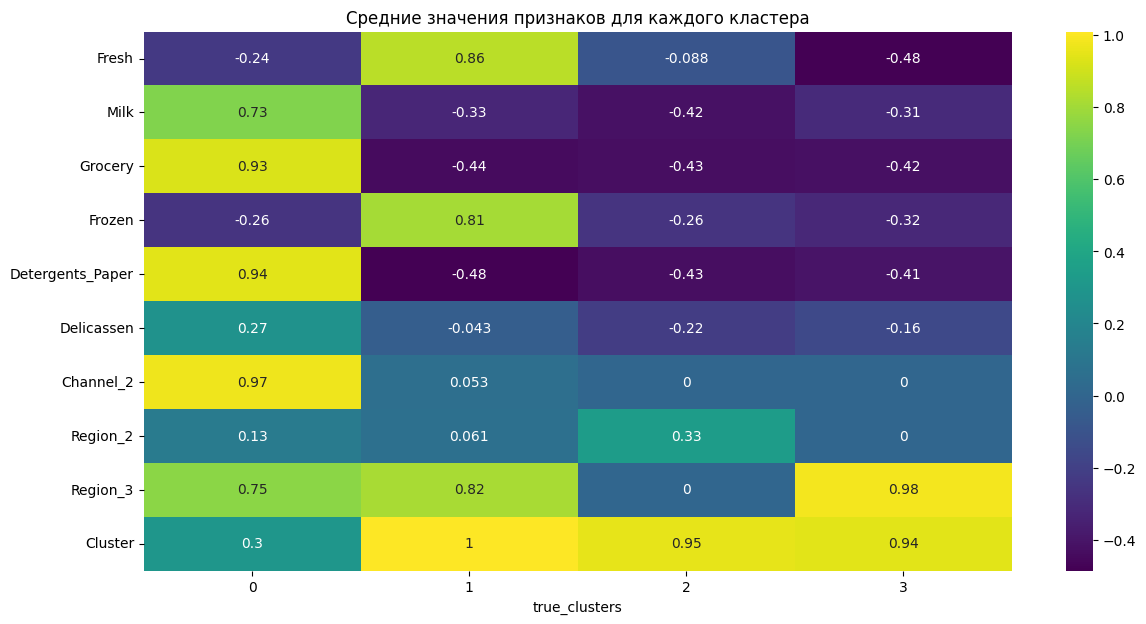

In [30]:
# Визуализация характеристик кластеров
import seaborn as sns
import matplotlib.pyplot as plt

# Построение графиков средних значений признаков для каждого кластера
fig, ax = plt.subplots(figsize=(14, 7))
sns.heatmap(cluster_means.T, annot=True, cmap='viridis')
plt.title('Средние значения признаков для каждого кластера')
plt.show()


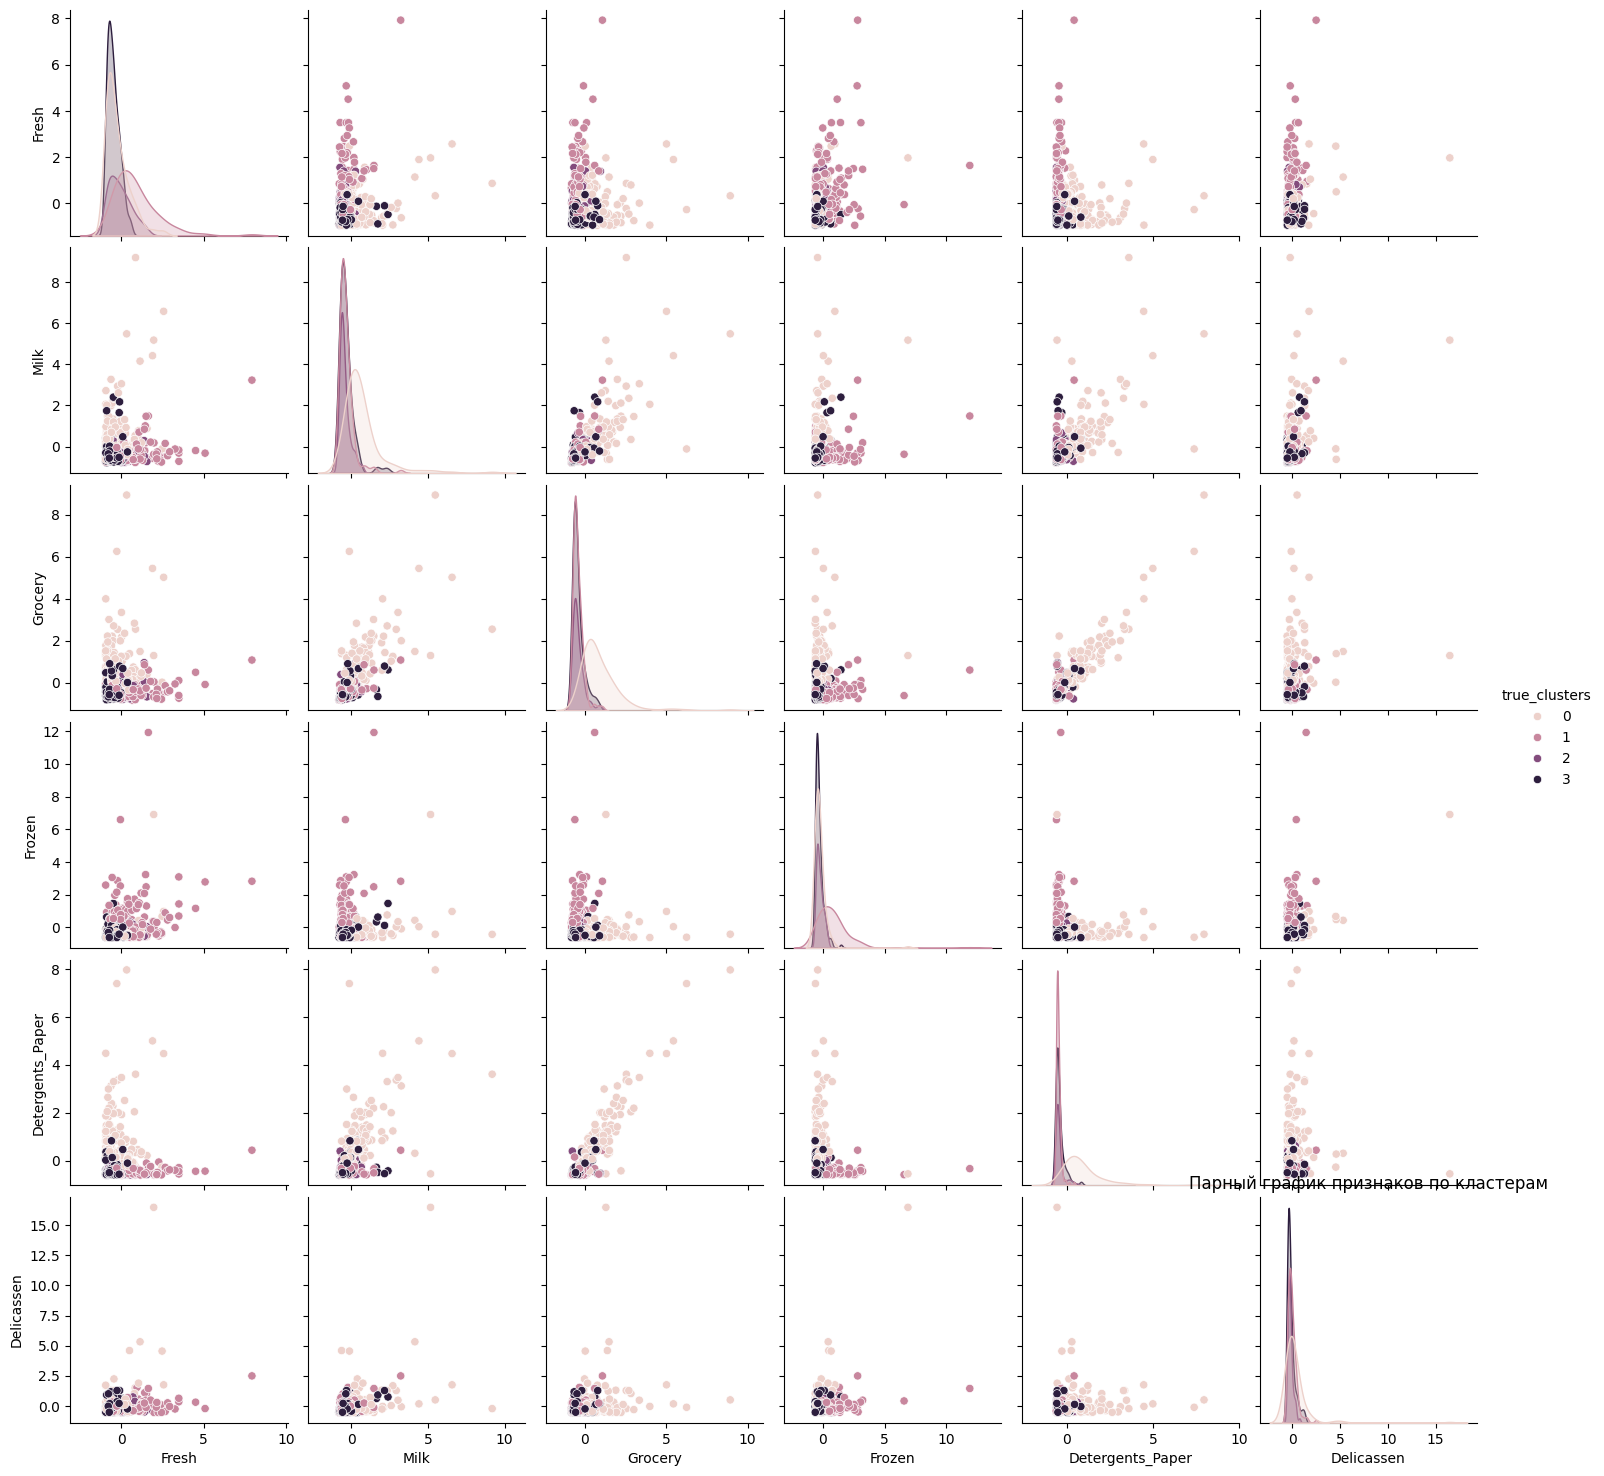

In [31]:
sns.pairplot(data, hue='true_clusters', vars=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
plt.title('Парный график признаков по кластерам')
plt.show()


#Применим другие алгоритмы класстеризации

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.manifold import TSNE

# Загрузка датасета
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
data = pd.read_csv(url)

# Нормализация количественных признаков
numeric_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Преобразование категориальных признаков
data = pd.get_dummies(data, columns=['Channel', 'Region'], drop_first=True)


#Определение Оптимального Количества Компонент для PCA и t-SNE


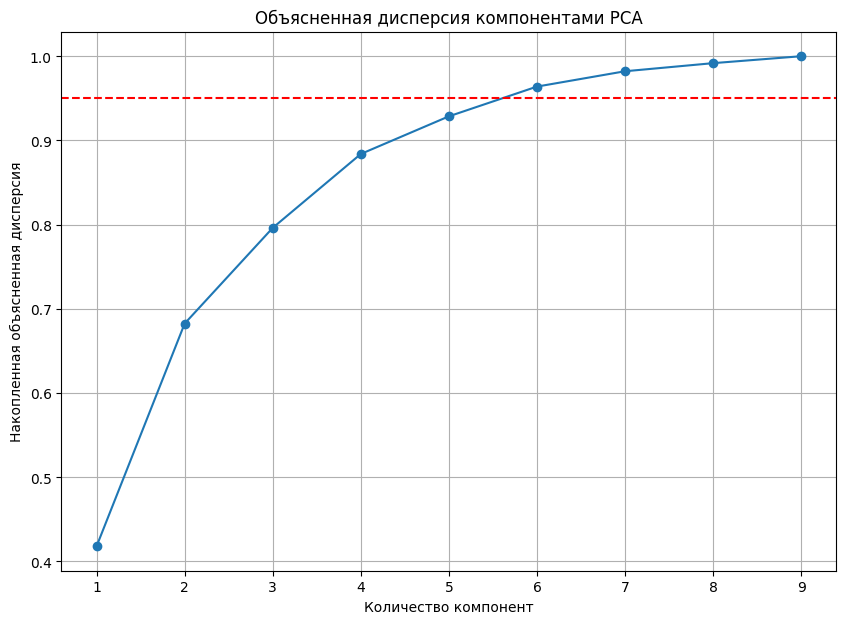

Оптимальное количество компонент PCA: 6


In [33]:
# Определение оптимального количества компонент для PCA
pca = PCA().fit(data)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Построение графика объясненной дисперсии
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title('Объясненная дисперсия компонентами PCA')
plt.xlabel('Количество компонент')
plt.ylabel('Накопленная объясненная дисперсия')
plt.grid()
plt.show()

# Определение оптимального количества компонент
optimal_pca_components = np.argmax(explained_variance >= 0.95) + 1
print(f'Оптимальное количество компонент PCA: {optimal_pca_components}')

# Применение PCA с оптимальным количеством компонент
pca_optimal = PCA(n_components=optimal_pca_components)
data_pca = pca_optimal.fit_transform(data)


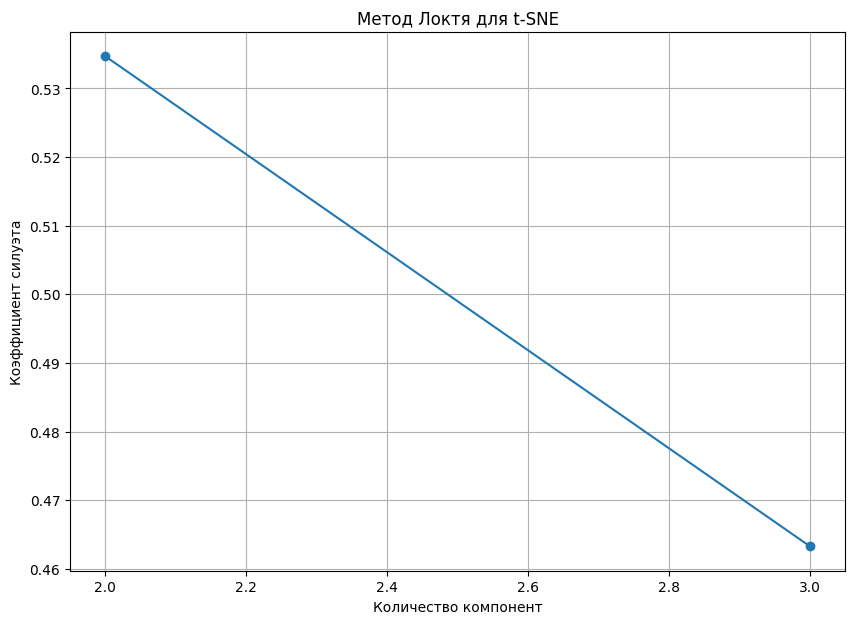

Оптимальное количество компонент для t-SNE: 2


In [37]:
# Определение оптимального количества компонент для t-SNE
silhouette_scores_tsne = []
components = [2, 3]

for n in components:
    tsne = TSNE(n_components=n, random_state=42)
    data_tsne = tsne.fit_transform(data)
    kmeans_tsne = KMeans(n_clusters=4, random_state=42, n_init=10).fit(data_tsne)
    labels_tsne = kmeans_tsne.labels_
    silhouette_scores_tsne.append(silhouette_score(data_tsne, labels_tsne))

plt.figure(figsize=(10, 7))
plt.plot(components, silhouette_scores_tsne, marker='o')
plt.title('Метод Локтя для t-SNE')
plt.xlabel('Количество компонент')
plt.ylabel('Коэффициент силуэта')
plt.grid()
plt.show()

optimal_tsne_components = components[np.argmax(silhouette_scores_tsne)]
print(f'Оптимальное количество компонент для t-SNE: {optimal_tsne_components}')

# Применение t-SNE с оптимальным количеством компонент
tsne_optimal = TSNE(n_components=optimal_tsne_components, random_state=42)
data_tsne = tsne_optimal.fit_transform(data)


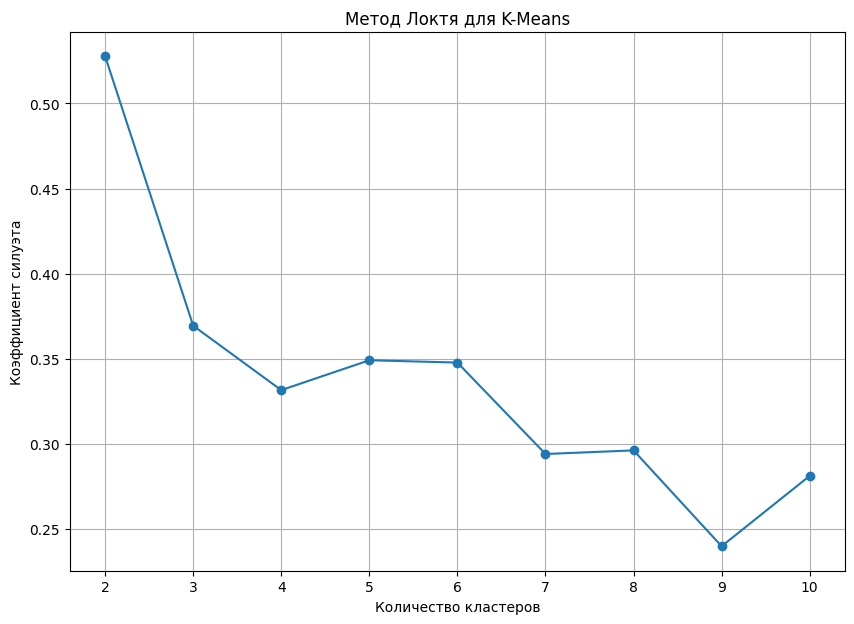

Оптимальное количество кластеров для K-Means: 2


In [38]:
# Определение оптимального количества кластеров для K-Means
silhouette_scores_kmeans = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(data_pca)
    silhouette_scores_kmeans.append(silhouette_score(data_pca, kmeans_labels))

plt.figure(figsize=(10, 7))
plt.plot(range(2, 11), silhouette_scores_kmeans, marker='o')
plt.title('Метод Локтя для K-Means')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.grid()
plt.show()

optimal_clusters_kmeans = silhouette_scores_kmeans.index(max(silhouette_scores_kmeans)) + 2
print(f'Оптимальное количество кластеров для K-Means: {optimal_clusters_kmeans}')

# Применение K-Means с оптимальным количеством кластеров
kmeans = KMeans(n_clusters=optimal_clusters_kmeans, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(data_pca)


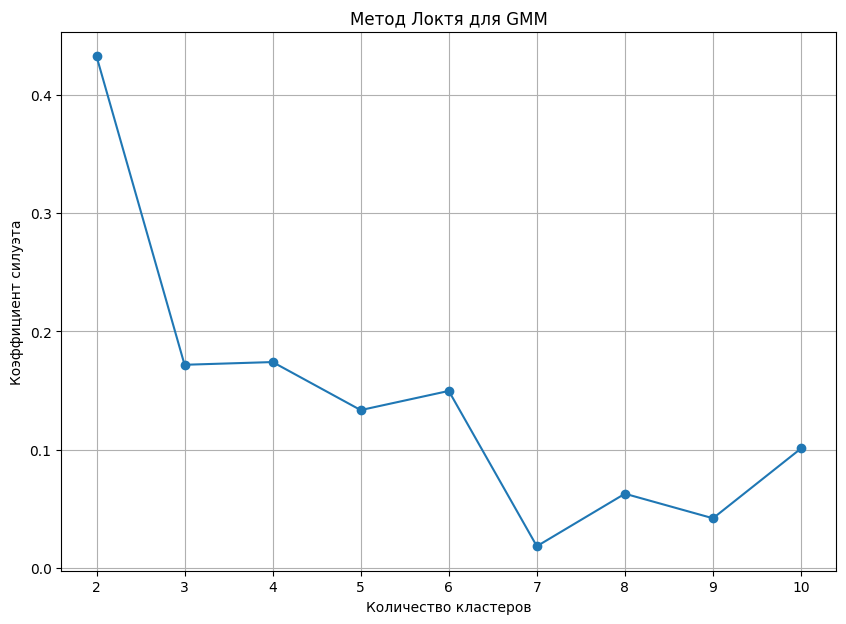

Оптимальное количество кластеров для GMM: 2


In [39]:
# Определение оптимального количества кластеров для GMM
silhouette_scores_gmm = []

for k in range(2, 11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(data_pca)
    silhouette_scores_gmm.append(silhouette_score(data_pca, gmm_labels))

plt.figure(figsize=(10, 7))
plt.plot(range(2, 11), silhouette_scores_gmm, marker='o')
plt.title('Метод Локтя для GMM')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.grid()
plt.show()

optimal_clusters_gmm = silhouette_scores_gmm.index(max(silhouette_scores_gmm)) + 2
print(f'Оптимальное количество кластеров для GMM: {optimal_clusters_gmm}')

# Применение GMM с оптимальным количеством кластеров
gmm = GaussianMixture(n_components=optimal_clusters_gmm, random_state=42)
gmm_labels = gmm.fit_predict(data_pca)


In [40]:
# Определение оптимальных значений eps и min_samples для DBSCAN
eps_values = np.arange(0.5, 3, 0.5)
min_samples_values = range(2, 10)
best_silhouette = -1
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(data_pca)
        if len(set(dbscan_labels)) > 1 and len(set(dbscan_labels)) < len(data_pca):  # Исключаем случаи, когда все точки считаются шумом
            score = silhouette_score(data_pca, dbscan_labels)
            if score > best_silhouette:
                best_silhouette = score
                best_eps = eps
                best_min_samples = min_samples

print(f'Лучшие значения для DBSCAN: eps = {best_eps}, min_samples = {best_min_samples}, Коэффициент силуэта = {best_silhouette}')

# Применение DBSCAN с оптимальными параметрами
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(data_pca)


Лучшие значения для DBSCAN: eps = 2.5, min_samples = 3, Коэффициент силуэта = 0.739975906605843


#Визуализация Результатов с Использованием PCA

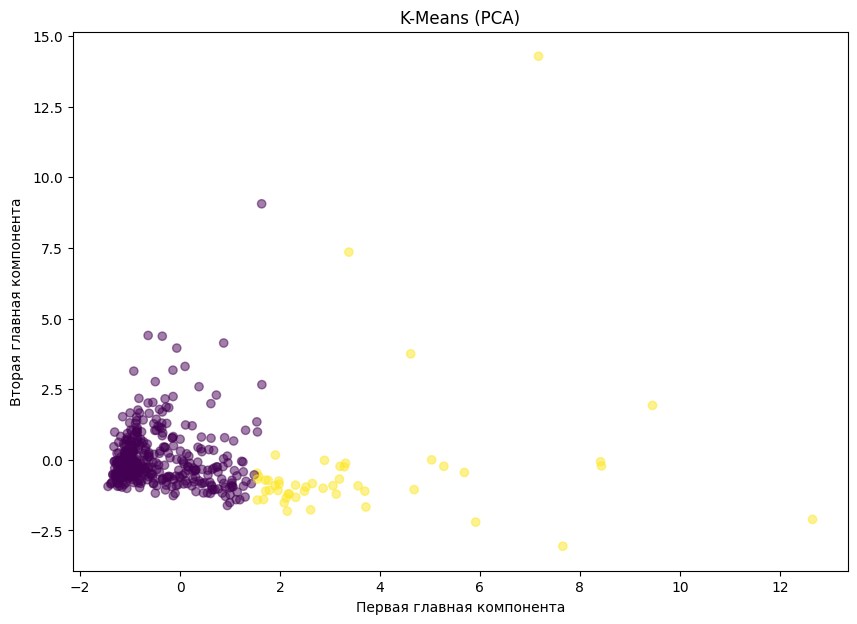

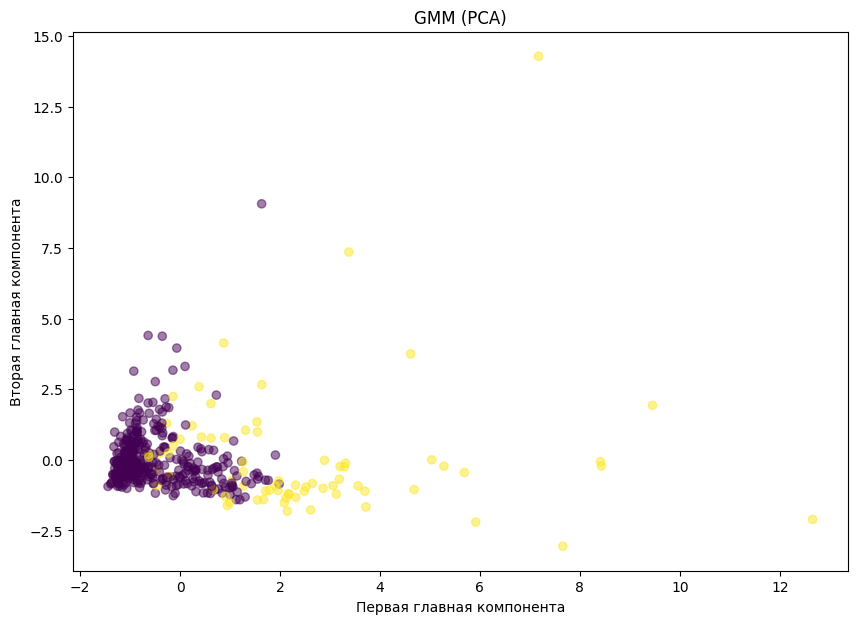

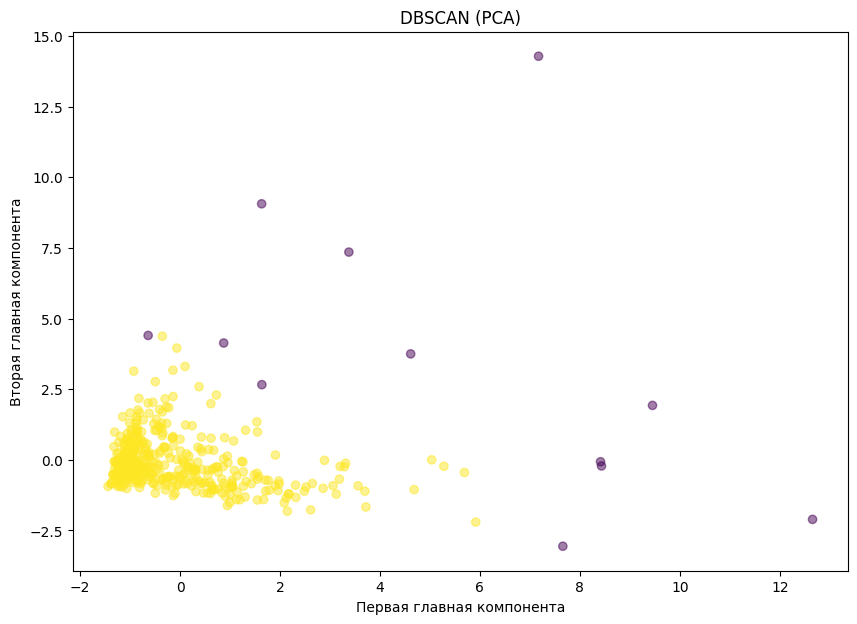

In [ ]:
# Визуализация K-Means (PCA)
plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('K-Means (PCA)')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.show()

# Визуализация GMM (PCA)
plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=gmm_labels, cmap='viridis', alpha=0.5)
plt.title('GMM (PCA)')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.show()

# Визуализация DBSCAN (PCA)
plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.5)
plt.title('DBSCAN (PCA)')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.show()


#Визуализация Результатов с Использованием t-SNE

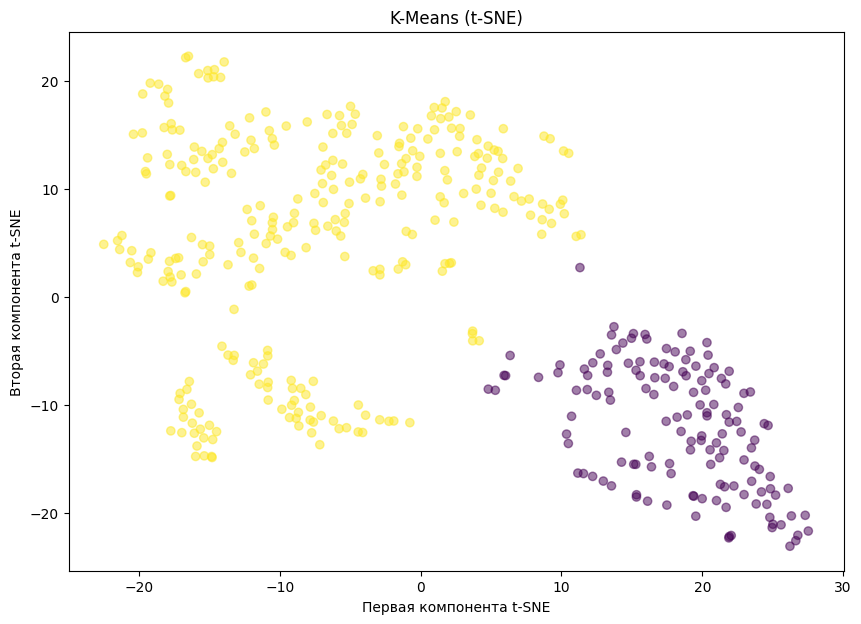

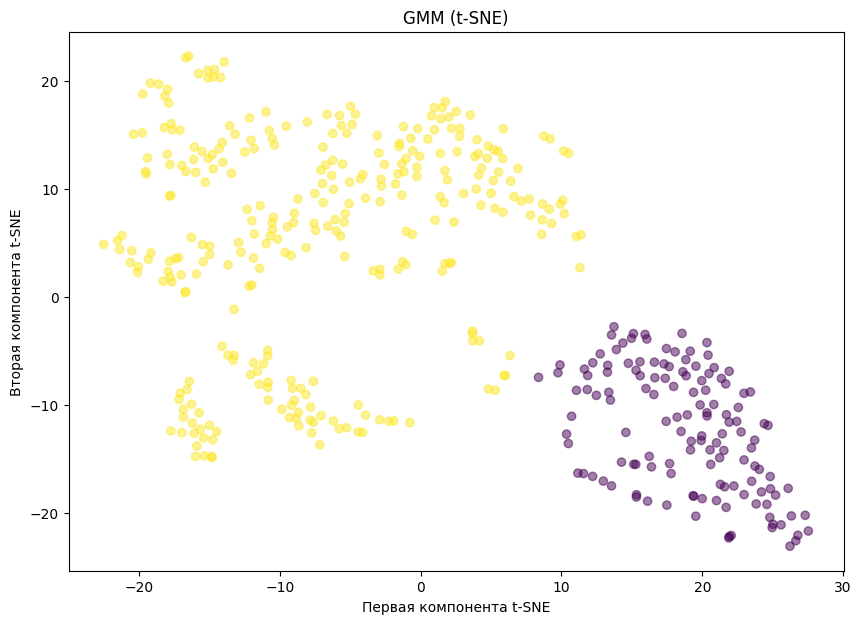

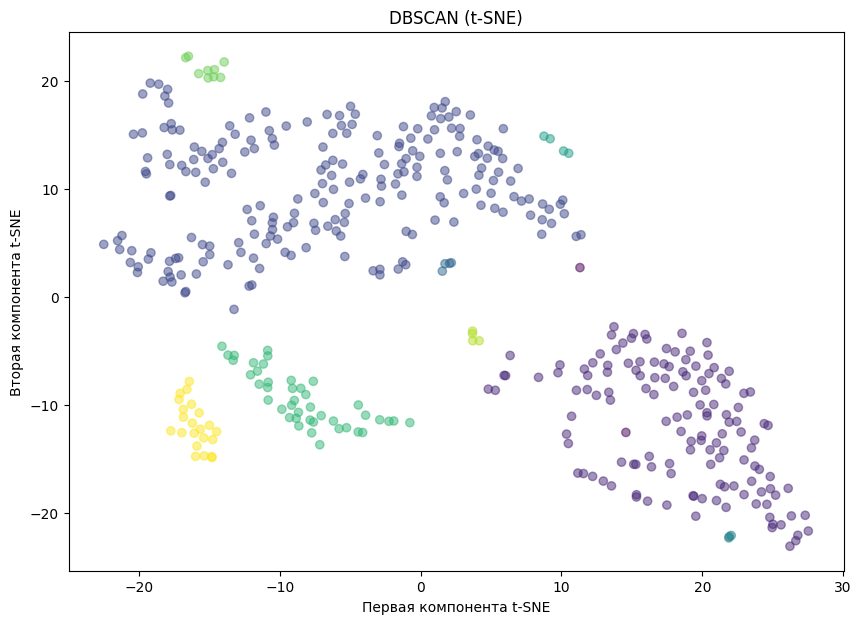

In [41]:
# Визуализация K-Means (t-SNE)
kmeans_tsne = KMeans(n_clusters=optimal_clusters_kmeans, random_state=42, n_init=10)
kmeans_labels_tsne = kmeans_tsne.fit_predict(data_tsne)

plt.figure(figsize=(10, 7))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=kmeans_labels_tsne, cmap='viridis', alpha=0.5)
plt.title('K-Means (t-SNE)')
plt.xlabel('Первая компонента t-SNE')
plt.ylabel('Вторая компонента t-SNE')
plt.show()

# Визуализация GMM (t-SNE)
gmm_tsne = GaussianMixture(n_components=optimal_clusters_gmm, random_state=42)
gmm_labels_tsne = gmm_tsne.fit_predict(data_tsne)

plt.figure(figsize=(10, 7))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=gmm_labels_tsne, cmap='viridis', alpha=0.5)
plt.title('GMM (t-SNE)')
plt.xlabel('Первая компонента t-SNE')
plt.ylabel('Вторая компонента t-SNE')
plt.show()

# Визуализация DBSCAN (t-SNE)
dbscan_tsne = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels_tsne = dbscan_tsne.fit_predict(data_tsne)

plt.figure(figsize=(10, 7))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=dbscan_labels_tsne, cmap='viridis', alpha=0.5)
plt.title('DBSCAN (t-SNE)')
plt.xlabel('Первая компонента t-SNE')
plt.ylabel('Вторая компонента t-SNE')
plt.show()


#Сравнение Результатов

In [42]:
# Коэффициент силуэта для K-Means
silhouette_kmeans_pca = silhouette_score(data_pca, kmeans_labels)
silhouette_kmeans_tsne = silhouette_score(data_tsne, kmeans_labels_tsne)

# Коэффициент силуэта для GMM
silhouette_gmm_pca = silhouette_score(data_pca, gmm_labels)
silhouette_gmm_tsne = silhouette_score(data_tsne, gmm_labels_tsne)

# Коэффициент силуэта для DBSCAN
if len(set(dbscan_labels)) > 1:
    silhouette_dbscan_pca = silhouette_score(data_pca, dbscan_labels)
else:
    silhouette_dbscan_pca = 'DBSCAN не смог выделить кластеры'

if len(set(dbscan_labels_tsne)) > 1:
    silhouette_dbscan_tsne = silhouette_score(data_tsne, dbscan_labels_tsne)
else:
    silhouette_dbscan_tsne = 'DBSCAN не смог выделить кластеры'

# Вывод результатов
print(f'Коэффициент силуэта (K-Means, PCA): {silhouette_kmeans_pca}')
print(f'Коэффициент силуэта (K-Means, t-SNE): {silhouette_kmeans_tsne}')
print(f'Коэффициент силуэта (GMM, PCA): {silhouette_gmm_pca}')
print(f'Коэффициент силуэта (GMM, t-SNE): {silhouette_gmm_tsne}')
print(f'Коэффициент силуэта (DBSCAN, PCA): {silhouette_dbscan_pca}')
print(f'Коэффициент силуэта (DBSCAN, t-SNE): {silhouette_dbscan_tsne}')


Коэффициент силуэта (K-Means, PCA): 0.527789893727771
Коэффициент силуэта (K-Means, t-SNE): 0.5510239601135254
Коэффициент силуэта (GMM, PCA): 0.43249351770961336
Коэффициент силуэта (GMM, t-SNE): 0.5480949282646179
Коэффициент силуэта (DBSCAN, PCA): 0.739975906605843
Коэффициент силуэта (DBSCAN, t-SNE): -0.029117798432707787


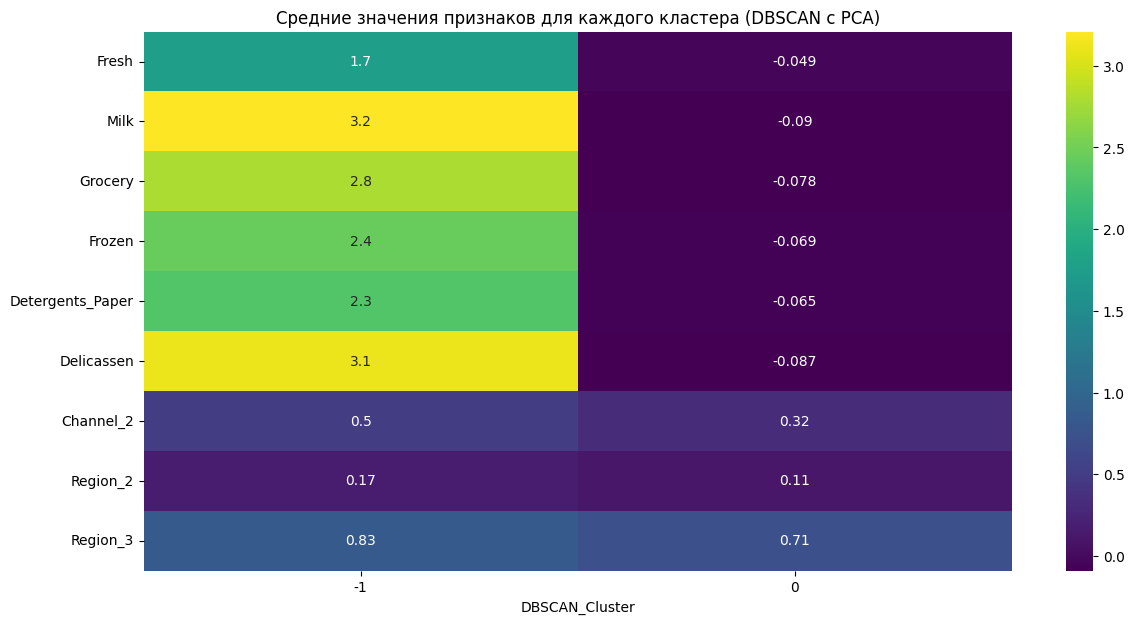

In [43]:
import seaborn as sns

# Добавление меток кластеров к данным
data['DBSCAN_Cluster'] = dbscan_labels

# Рассчет средних значений признаков для каждого кластера
cluster_means = data.groupby('DBSCAN_Cluster').mean()

# Построение тепловой карты
plt.figure(figsize=(14, 7))
sns.heatmap(cluster_means.T, annot=True, cmap='viridis')
plt.title('Средние значения признаков для каждого кластера (DBSCAN с PCA)')
plt.show()


# "Online Shoppers Purchasing Intention Dataset" из UCI Machine Learning Repository. Датасет содержит векторы признаков для 12,330 сеансов покупок. Целью является изучение поведения пользователей в интернет-магазине и предсказание намерения пользователя совершить покупку. Датасет включает как числовые, так и категориальные признаки, такие как количество различных типов страниц, посещенных пользователем, продолжительность посещений, показатели отказов и выхода, а также различные метрики Google Analytics.

#Характеристики датасета:

Количество экземпляров: 12,330

Количество признаков: 17

Типы признаков: Числовые и категориальные

Основные признаки:

Administrative и Administrative Duration: количество и продолжительность посещений административных страниц

Informational и Informational Duration: количество и продолжительность посещений информационных страниц

Product Related и Product Related Duration: количество и продолжительность посещений страниц, связанных с продуктами

Bounce Rates, Exit Rates, Page Values: метрики Google Analytics
Special Day: указывает на близость времени посещения сайта к определенному праздничному дню

Operating System, Browser, Region, Traffic Type: характеристики сеанса
Visitor Type, Weekend, Month: информация о пользователе и времени сеанса#

In [ ]:
# Установка пакета wget, если он еще не установлен
!pip install wget


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=68b40ff8bbe714c6c4bfc0d61f65f5fa2b750a579a130815fdab65ae171c6547
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import wget
import pandas as pd

# URL для загрузки датасета
url = 'https://archive.ics.uci.edu/static/public/468/online+shoppers+purchasing+intention+dataset.zip'

# Загрузка датасета
filename = wget.download(url)

# Чтение загруженного файла
data = pd.read_csv(filename)

# Отображение первых 10 строк
data.head(10)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False
